In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [43]:
filename = 'final_training.xlsx'
df = pd.read_excel(filename)

In [22]:
df.head()

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,44164,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN
1,3926,노년,남성,"건강, 죽음",만성질환 유,불안,스트레스 받는,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN,NaN
2,50882,청소년,여성,학업 및 진로,해당없음,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,이 상황에서 할 수 있는 게 어떤 것이 있을까요?,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,수업을 어떤 방식으로 열심히 듣는게 좋을까요?,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.,열심히 해서 좋은 결과가 있었으면 좋겠어요.
3,31303,노년,남성,재정,만성질환 무,기쁨,신이 난,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,재취업 후 첫 월급이라 정말 기쁘시겠어요.,퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 ...,이 기분을 유지하려면 어떻게 해야 할까요?,회사생활을 열심히 해서 계속 월급을 받을거야!,계속 원하시는 대로 회사생활이 이어지길 바랄게요.,NaN,NaN
4,47200,노년,여성,재정,만성질환 유,기쁨,안도,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,기분 좋으시겠어요. 앞으로는 어떻게 하실 생각이신가요?,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어.,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶으시군요.,NaN,NaN,NaN,NaN


In [23]:
df.isnull().sum()

번호            0
연령            0
성별            0
상황키워드         0
신체질환          0
감정_대분류        0
감정_소분류        0
사람문장1         0
시스템응답1        0
사람문장2         0
시스템응답2        0
사람문장3      9820
시스템응답3     9820
사람문장4     39407
시스템응답4    39517
dtype: int64

In [24]:
print(df['연령'].unique()) # LabelEncoding
print(df['성별'].unique()) # LabelEncoding
print(df['상황키워드'].unique()) 
print(df['신체질환'].unique()) # LabelEncoding
print(df['감정_대분류'].unique()) # '불안 ', '기쁨 ' -> '불안', '기쁨' && LabelEncoding
print(df['감정_소분류'].unique()) # dropna

['청년' '노년' '청소년' '중년']
['남성' '여성']
['연애, 결혼, 출산' '건강, 죽음' '학업 및 진로' '재정' '재정, 은퇴, 노후준비' '건강' '학교폭력/따돌림'
 '대인관계' '진로, 취업, 직장' '가족관계' '직장, 업무 스트레스' '대인관계(부부, 자녀)']
['해당없음' '만성질환 유' '만성질환 무']
['기쁨' '불안' '당황' '슬픔' '분노' '상처' '불안 ' '기쁨 ']
['신이 난' '스트레스 받는' '당황' '안도' '취약한' '우울한' '구역질 나는' '좌절한' '눈물이 나는' '배신당한'
 '남의 시선을 의식하는' '죄책감의' '당혹스러운' '분노' '두려운' '낙담한' '회의적인' '마비된' '혼란스러운' '흥분'
 '한심한' '염세적인' '안달하는' '걱정스러운' '조심스러운' '충격 받은' '상처' '불안' '노여워하는' '기쁨' '짜증내는'
 '환멸을 느끼는' '비통한' '혐오스러운' '억울한' '만족스러운' '부끄러운' '버려진' '고립된' '괴로워하는' '자신하는'
 '외로운' '방어적인' '편안한' '질투하는' '감사하는' '초조한' '실망한' '슬픔' '신뢰하는' '가난한, 불우한'
 '후회되는' '툴툴대는' '성가신' '열등감' '희생된' '느긋' '악의적인']


# LabelEncoding, drop, value값 변경

- 연령 - 0 노년 / 1 중년 / 2 청년 / 3 청소년

- 성별 - 0 남성 / 1 여성

- 신체질환 - 0 만성질환 무 / 1 만성질환 유 / 2 해당없음
- 감정_대분류 - 0 기쁨 / 1 당황 / 2 분노 / 3 불안 / 4 상처 / 5 슬픔

In [44]:
df = df.drop(['감정_소분류'], axis=1)

In [45]:
# 감정_대분류 : '불안 ', '기쁨 ' -> '불안', '기쁨'
df.loc[df['감정_대분류'] == '기쁨 ', '감정_대분류'] = '기쁨'
df.loc[df['감정_대분류'] == '불안 ', '감정_대분류'] = '불안'

In [38]:
# # LabelEncoding
# encoder = LabelEncoder()

# encoder.fit(df['연령'])
# label_encoded1 = encoder.transform(df['연령'])

# encoder.fit(df['성별'])
# label_encoded2 = encoder.transform(df['성별'])

# encoder.fit(df['신체질환'])
# label_encoded3 = encoder.transform(df['신체질환'])

# encoder.fit(df['감정_대분류'])
# label_encoded4 = encoder.transform(df['감정_대분류'])

# df['연령'] = label_encoded1
# df['성별'] = label_encoded2
# df['신체질환'] = label_encoded3
# df['감정_대분류'] = label_encoded4

In [46]:
df.head()

,번호,연령,성별,상황키워드,신체질환,감정_대분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,44164,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN
1,3926,노년,남성,"건강, 죽음",만성질환 유,불안,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN,NaN
2,50882,청소년,여성,학업 및 진로,해당없음,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,이 상황에서 할 수 있는 게 어떤 것이 있을까요?,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,수업을 어떤 방식으로 열심히 듣는게 좋을까요?,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.,열심히 해서 좋은 결과가 있었으면 좋겠어요.
3,31303,노년,남성,재정,만성질환 무,기쁨,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,재취업 후 첫 월급이라 정말 기쁘시겠어요.,퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 ...,이 기분을 유지하려면 어떻게 해야 할까요?,회사생활을 열심히 해서 계속 월급을 받을거야!,계속 원하시는 대로 회사생활이 이어지길 바랄게요.,NaN,NaN
4,47200,노년,여성,재정,만성질환 유,기쁨,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,기분 좋으시겠어요. 앞으로는 어떻게 하실 생각이신가요?,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어.,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶으시군요.,NaN,NaN,NaN,NaN


df.dtypes

# 사람문장, 시스템응답 컬럼 제외하고 Visualization

In [47]:
df_info = df.copy()
df_info.drop(['사람문장1', '시스템응답1', '사람문장2', '시스템응답2', '사람문장3', '시스템응답3', '사람문장4', '시스템응답4'], 
             axis=1, inplace=True)

In [48]:
df_info

,번호,연령,성별,상황키워드,신체질환,감정_대분류
0,44164,청년,남성,"연애, 결혼, 출산",해당없음,기쁨
1,3926,노년,남성,"건강, 죽음",만성질환 유,불안
2,50882,청소년,여성,학업 및 진로,해당없음,당황
3,31303,노년,남성,재정,만성질환 무,기쁨
4,47200,노년,여성,재정,만성질환 유,기쁨
...,...,...,...,...,...,...
40874,50789,청년,남성,대인관계,해당없음,불안
40875,48959,중년,남성,건강,해당없음,기쁨
40876,36344,청소년,여성,가족관계,해당없음,슬픔
40877,14197,노년,여성,재정,만성질환 무,기쁨


In [69]:
age_group = df_info['연령'].unique()
age_group_count = df_info['연령'].value_counts(sort=False)

gender = df_info['성별'].unique()
gender_count = df_info['성별'].value_counts(sort=False)

disease = df_info['신체질환'].unique()
disease_count = df_info['신체질환'].value_counts(sort=False)

emotion = df_info['감정_대분류'].unique()
emotion_count = df_info['감정_대분류'].value_counts(sort=False)

['청년' '노년' '청소년' '중년']
청년     12505
노년     10150
청소년     7339
중년     10885
Name: 연령, dtype: int64


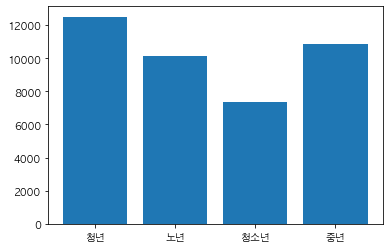

['남성' '여성']
남성    18160
여성    22719
Name: 성별, dtype: int64


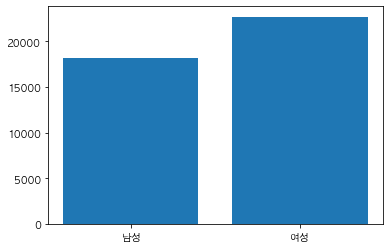

['해당없음' '만성질환 유' '만성질환 무']
해당없음      30729
만성질환 유     4962
만성질환 무     5188
Name: 신체질환, dtype: int64


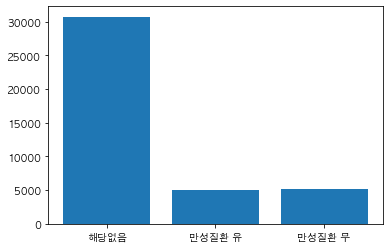

['기쁨' '불안' '당황' '슬픔' '분노' '상처']
기쁨    6731
불안    7329
당황    6360
슬픔    6915
분노    6920
상처    6624
Name: 감정_대분류, dtype: int64


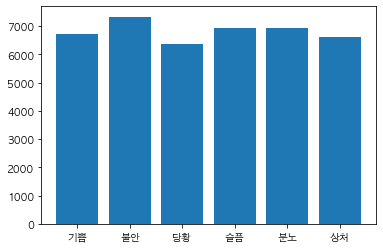

In [70]:
print(age_group)
print(age_group_count)
plt.bar(age_group, age_group_count)
plt.show()

print(gender)
print(gender_count)
plt.bar(gender, gender_count)
plt.show()

print(disease)
print(disease_count)
plt.bar(disease, disease_count)
plt.show()

print(emotion)
print(emotion_count)
plt.bar(emotion, emotion_count)
plt.show()

### 연령

[2034, 2199, 1981, 2099, 2113, 2079]
[1716, 1818, 1613, 1749, 1623, 1631]
[1144, 1258, 1097, 1274, 1333, 1233]
[1837, 2054, 1669, 1793, 1851, 1681]


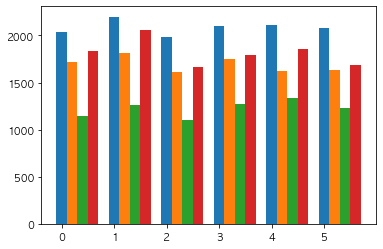

In [121]:
emotion_age0_count = [len(df_info[(df['감정_대분류']=='기쁨')&(df_info['연령']=='청년')]), 
                     len(df_info[(df['감정_대분류']=='불안')&(df_info['연령']=='청년')]), 
                     len(df_info[(df['감정_대분류']=='당황')&(df_info['연령']=='청년')]), 
                     len(df_info[(df['감정_대분류']=='슬픔')&(df_info['연령']=='청년')]), 
                     len(df_info[(df['감정_대분류']=='분노')&(df_info['연령']=='청년')]), 
                     len(df_info[(df['감정_대분류']=='상처')&(df_info['연령']=='청년')])]

emotion_age1_count = [len(df_info[(df['감정_대분류']=='기쁨')&(df_info['연령']=='노년')]), 
                     len(df_info[(df['감정_대분류']=='불안')&(df_info['연령']=='노년')]), 
                     len(df_info[(df['감정_대분류']=='당황')&(df_info['연령']=='노년')]), 
                     len(df_info[(df['감정_대분류']=='슬픔')&(df_info['연령']=='노년')]), 
                     len(df_info[(df['감정_대분류']=='분노')&(df_info['연령']=='노년')]), 
                     len(df_info[(df['감정_대분류']=='상처')&(df_info['연령']=='노년')])]

emotion_age2_count = [len(df_info[(df['감정_대분류']=='기쁨')&(df_info['연령']=='청소년')]), 
                     len(df_info[(df['감정_대분류']=='불안')&(df_info['연령']=='청소년')]), 
                     len(df_info[(df['감정_대분류']=='당황')&(df_info['연령']=='청소년')]), 
                     len(df_info[(df['감정_대분류']=='슬픔')&(df_info['연령']=='청소년')]), 
                     len(df_info[(df['감정_대분류']=='분노')&(df_info['연령']=='청소년')]), 
                     len(df_info[(df['감정_대분류']=='상처')&(df_info['연령']=='청소년')])]

emotion_age3_count = [len(df_info[(df['감정_대분류']=='기쁨')&(df_info['연령']=='중년')]), 
                     len(df_info[(df['감정_대분류']=='불안')&(df_info['연령']=='중년')]), 
                     len(df_info[(df['감정_대분류']=='당황')&(df_info['연령']=='중년')]), 
                     len(df_info[(df['감정_대분류']=='슬픔')&(df_info['연령']=='중년')]), 
                     len(df_info[(df['감정_대분류']=='분노')&(df_info['연령']=='중년')]), 
                     len(df_info[(df['감정_대분류']=='상처')&(df_info['연령']=='중년')])]

print(emotion_age0_count)
print(emotion_age1_count)
print(emotion_age2_count)
print(emotion_age3_count)

X = np.arange(len(emotion))
plt.bar(X+0.00, emotion_age0_count, width=0.20)
plt.bar(X+0.20, emotion_age1_count, width=0.20)
plt.bar(X+0.40, emotion_age2_count, width=0.20)
plt.bar(X+0.60, emotion_age3_count, width=0.20)
plt.show()

### 성별

[2908, 3240, 2767, 3163, 3232, 2850]
[3823, 4089, 3593, 3752, 3688, 3774]


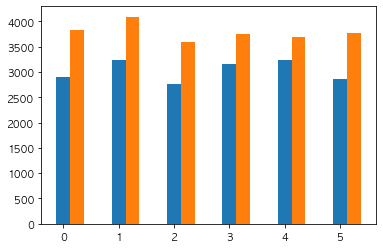

In [122]:
emotion_male_count = [len(df_info[(df['감정_대분류']=='기쁨')&(df_info['성별']=='남성')]), 
                     len(df_info[(df['감정_대분류']=='불안')&(df_info['성별']=='남성')]), 
                     len(df_info[(df['감정_대분류']=='당황')&(df_info['성별']=='남성')]), 
                     len(df_info[(df['감정_대분류']=='슬픔')&(df_info['성별']=='남성')]), 
                     len(df_info[(df['감정_대분류']=='분노')&(df_info['성별']=='남성')]), 
                     len(df_info[(df['감정_대분류']=='상처')&(df_info['성별']=='남성')])]

emotion_female_count = [len(df_info[(df['감정_대분류']=='기쁨')&(df_info['성별']=='여성')]), 
                     len(df_info[(df['감정_대분류']=='불안')&(df_info['성별']=='여성')]), 
                     len(df_info[(df['감정_대분류']=='당황')&(df_info['성별']=='여성')]), 
                     len(df_info[(df['감정_대분류']=='슬픔')&(df_info['성별']=='여성')]), 
                     len(df_info[(df['감정_대분류']=='분노')&(df_info['성별']=='여성')]), 
                     len(df_info[(df['감정_대분류']=='상처')&(df_info['성별']=='여성')])]

print(emotion_male_count)
print(emotion_female_count)

X = np.arange(len(emotion))
plt.bar(X+0.00, emotion_male_count, width=0.25)
plt.bar(X+0.25, emotion_female_count, width=0.25)
plt.show()

### 신체질환

[5015, 5511, 4747, 5166, 5297, 4993]
[806, 881, 786, 887, 822, 780]
[910, 937, 827, 862, 801, 851]


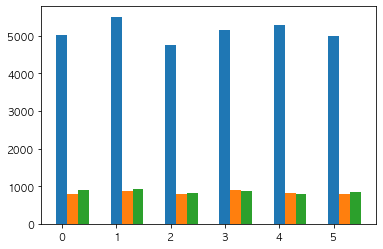

In [123]:
emotion_disease0_count = [len(df_info[(df['감정_대분류']=='기쁨')&(df_info['신체질환']=='해당없음')]), 
                     len(df_info[(df['감정_대분류']=='불안')&(df_info['신체질환']=='해당없음')]), 
                     len(df_info[(df['감정_대분류']=='당황')&(df_info['신체질환']=='해당없음')]), 
                     len(df_info[(df['감정_대분류']=='슬픔')&(df_info['신체질환']=='해당없음')]), 
                     len(df_info[(df['감정_대분류']=='분노')&(df_info['신체질환']=='해당없음')]), 
                     len(df_info[(df['감정_대분류']=='상처')&(df_info['신체질환']=='해당없음')])]

emotion_disease1_count = [len(df_info[(df['감정_대분류']=='기쁨')&(df_info['신체질환']=='만성질환 유')]), 
                     len(df_info[(df['감정_대분류']=='불안')&(df_info['신체질환']=='만성질환 유')]), 
                     len(df_info[(df['감정_대분류']=='당황')&(df_info['신체질환']=='만성질환 유')]), 
                     len(df_info[(df['감정_대분류']=='슬픔')&(df_info['신체질환']=='만성질환 유')]), 
                     len(df_info[(df['감정_대분류']=='분노')&(df_info['신체질환']=='만성질환 유')]), 
                     len(df_info[(df['감정_대분류']=='상처')&(df_info['신체질환']=='만성질환 유')])]

emotion_disease2_count = [len(df_info[(df['감정_대분류']=='기쁨')&(df_info['신체질환']=='만성질환 무')]), 
                     len(df_info[(df['감정_대분류']=='불안')&(df_info['신체질환']=='만성질환 무')]), 
                     len(df_info[(df['감정_대분류']=='당황')&(df_info['신체질환']=='만성질환 무')]), 
                     len(df_info[(df['감정_대분류']=='슬픔')&(df_info['신체질환']=='만성질환 무')]), 
                     len(df_info[(df['감정_대분류']=='분노')&(df_info['신체질환']=='만성질환 무')]), 
                     len(df_info[(df['감정_대분류']=='상처')&(df_info['신체질환']=='만성질환 무')])]

print(emotion_disease0_count)
print(emotion_disease1_count)
print(emotion_disease2_count)

X = np.arange(len(emotion))
plt.bar(X+0.00, emotion_disease0_count, width=0.20)
plt.bar(X+0.20, emotion_disease1_count, width=0.20)
plt.bar(X+0.40, emotion_disease2_count, width=0.20)
plt.show()

<!-- # 감정_대분류를 target value로 봤을 때, 
# 연령, 성별, 신체질환의 각 value 비중이 맞지 않는 것 같음
# => scaling -->

- 감정_대분류를 target value로 봤을 때, 
- 연령, 성별, 신체질환의 각 value 비중이 맞지 않는 것 같음
- => scaling 필요 (standard or minmax)

# 사람문장, 시스템응답 Preprocessing